In [2]:
import networkx
from operator import itemgetter
import matplotlib.pyplot as plt

# Read the data from the amazon-books.txt;
# populate amazonProducts nested dicitonary;
# key = ASIN; value = MetaData associated with ASIN
fhr = open('./amazon-books.txt', 'r', encoding='utf-8', errors='ignore')
amazonBooks = {}
fhr.readline()
for line in fhr:
    cell = line.split('\t')
    MetaData = {}
    MetaData['Id'] = cell[0].strip() 
    ASIN = cell[1].strip()
    MetaData['Title'] = cell[2].strip()
    MetaData['Categories'] = cell[3].strip()
    MetaData['Group'] = cell[4].strip()
    MetaData['SalesRank'] = int(cell[5].strip())
    MetaData['TotalReviews'] = int(cell[6].strip())
    MetaData['AvgRating'] = float(cell[7].strip())
    MetaData['DegreeCentrality'] = int(cell[8].strip())
    MetaData['ClusteringCoeff'] = float(cell[9].strip())
    amazonBooks[ASIN] = MetaData
fhr.close()

# Read the data from amazon-books-copurchase.adjlist;
# assign it to copurchaseGraph weighted Graph;
# node = ASIN, edge= copurchase, edge weight = category similarity
fhr=open("amazon-books-copurchase.edgelist", 'rb')
copurchaseGraph=networkx.read_weighted_edgelist(fhr)
fhr.close()

# Now let's assume a person is considering buying the following book;
# what else can we recommend to them based on copurchase behavior 
# we've seen from other users?
print ("Looking for Recommendations for Customer Purchasing this Book:")
print ("--------------------------------------------------------------")
purchasedAsin = '0805047905'#0805047905 0399216596 0694013013

# Let's first get some metadata associated with this book
print ("ASIN = ", purchasedAsin) 
print ("Title = ", amazonBooks[purchasedAsin]['Title'])
print ("SalesRank = ", amazonBooks[purchasedAsin]['SalesRank'])
print ("TotalReviews = ", amazonBooks[purchasedAsin]['TotalReviews'])
print ("AvgRating = ", amazonBooks[purchasedAsin]['AvgRating'])
print ("DegreeCentrality = ", amazonBooks[purchasedAsin]['DegreeCentrality'])
print ("ClusteringCoeff = ", amazonBooks[purchasedAsin]['ClusteringCoeff'])
    

Looking for Recommendations for Customer Purchasing this Book:
--------------------------------------------------------------
ASIN =  0805047905
Title =  Brown Bear, Brown Bear, What Do You See?
SalesRank =  171
TotalReviews =  172
AvgRating =  5.0
DegreeCentrality =  216
ClusteringCoeff =  0.65


In [3]:
purchasedAsinEgoGraph = networkx.Graph()
n=purchasedAsin
purchasedAsinEgoGraph = networkx.ego_graph(copurchaseGraph, n, radius=1)

threshold = 0.5
purchasedAsinEgoTrimGraph = networkx.Graph()
for f, t, e in purchasedAsinEgoGraph.edges(data=True):
    if e['weight'] >= threshold:
        purchasedAsinEgoTrimGraph.add_edge(f,t,weight=e['weight'])

purchasedAsinNeighbors = [i for i in purchasedAsinEgoTrimGraph.neighbors(n)]
print(purchasedAsinNeighbors)
print(len(purchasedAsinNeighbors))

['0152380116', '0399230130', '0399229191', '0399237720', '0399220496', '0152166084', '0399226907', '0152007717', '0399216596', '0399234276', '0152010661', '0694013013', '0688148999', '1581170769', '0399208534', '0399211667', '0399218858', '067187893X', '1929927266', '088708026X', '0694006246', '0698116453', '0808528858', '0399213015', '078570244X', '0064435962', '0399226842', '0152009981', '0688109942', '0805053883', '0060235152']
31


In [73]:
import pandas as pd

df=pd.DataFrame.from_dict(data=amazonBooks,orient='index', columns=['Title','SalesRank','TotalReviews','AvgRating','DegreeCentrality','ClusteringCoeff'])

In [74]:
df.head()

,Title,SalesRank,TotalReviews,AvgRating,DegreeCentrality,ClusteringCoeff
0000037931,"Saluki Champions, 1952-1988",2031890,0,0.0,0,0.00
0001047655,Prodigal Daughter,1116690,30,4.0,5,0.93
0001053388,The Poetry of Lord Byron,1874503,0,0.0,0,0.00
0001053736,Sir Gawain and the Green Knight,53150,15,4.5,5,0.70
0001053744,Pearl and Sir Orfeo,500890,1,5.0,0,0.00


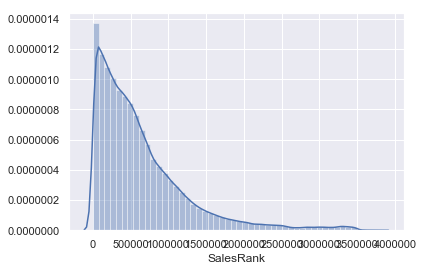

In [75]:
import seaborn as sns
sns.distplot(df['SalesRank'], hist=True, kde=True, rug=False);

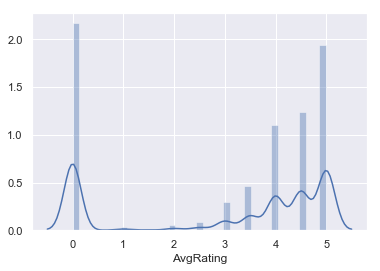

In [90]:
sns.distplot(df['AvgRating'], hist=True, kde=True, rug=False);

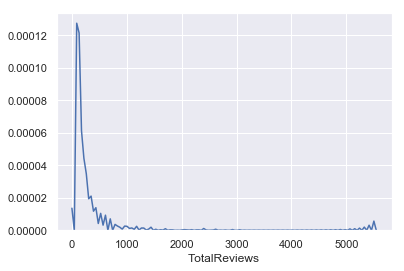

In [94]:
sns.distplot(df['TotalReviews'], hist=False, kde=True, rug=False);

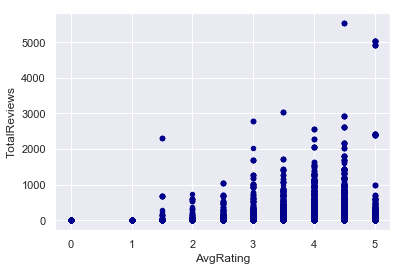

In [100]:
ax1 = df.plot.scatter(x='AvgRating', y='TotalReviews',c='DarkBlue')

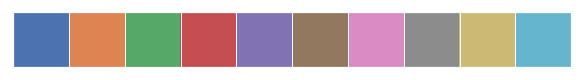

In [76]:
##### setting and checking color palette: deep, muted, pastel, bright, dark, and colorblind
sns.set_palette("deep")
sns.palplot(sns.color_palette()) 
sns.set(color_codes=True)

In [77]:
df['NDC']=(df['DegreeCentrality']-df['DegreeCentrality'].min())/(df['DegreeCentrality'].max()-df['DegreeCentrality'].min())

In [78]:
df.head()

,Title,SalesRank,TotalReviews,AvgRating,DegreeCentrality,ClusteringCoeff,NDC
0000037931,"Saluki Champions, 1952-1988",2031890,0,0.0,0,0.00,0.000000
0001047655,Prodigal Daughter,1116690,30,4.0,5,0.93,0.015432
0001053388,The Poetry of Lord Byron,1874503,0,0.0,0,0.00,0.000000
0001053736,Sir Gawain and the Green Knight,53150,15,4.5,5,0.70,0.015432
0001053744,Pearl and Sir Orfeo,500890,1,5.0,0,0.00,0.000000


In [79]:
df.count()

Title               393561
SalesRank           393561
TotalReviews        393561
AvgRating           393561
DegreeCentrality    393561
ClusteringCoeff     393561
NDC                 393561
dtype: int64

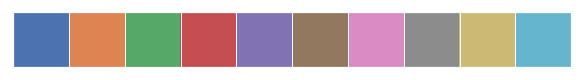

In [80]:
##### setting and checking color palette: deep, muted, pastel, bright, dark, and colorblind
sns.set_palette("deep")
sns.palplot(sns.color_palette()) 
sns.set(color_codes=True)

(0.5, 1.2)

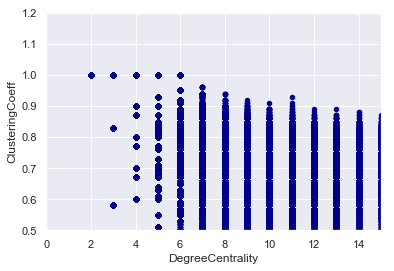

In [116]:
ax1 = df.plot.scatter(x='DegreeCentrality', y='ClusteringCoeff',c='DarkBlue')
plt.xlim(0,15)
plt.ylim(0.5,1.2)
#plt.show()

In [82]:
#sns.jointplot(x=df['DegreeCentrality'], y=df['ClusteringCoeff'], kind='kde',color='k')

In [83]:
df['DScore']=pow(df['DegreeCentrality'],df['ClusteringCoeff'])
df.head()

,Title,SalesRank,TotalReviews,AvgRating,DegreeCentrality,ClusteringCoeff,NDC,DScore
0000037931,"Saluki Champions, 1952-1988",2031890,0,0.0,0,0.00,0.000000,1.000000
0001047655,Prodigal Daughter,1116690,30,4.0,5,0.93,0.015432,4.467269
0001053388,The Poetry of Lord Byron,1874503,0,0.0,0,0.00,0.000000,1.000000
0001053736,Sir Gawain and the Green Knight,53150,15,4.5,5,0.70,0.015432,3.085169
0001053744,Pearl and Sir Orfeo,500890,1,5.0,0,0.00,0.000000,1.000000


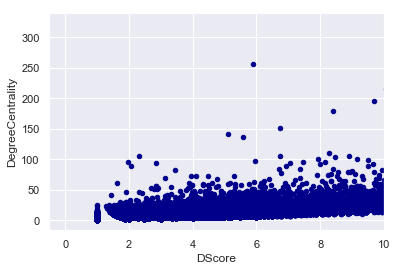

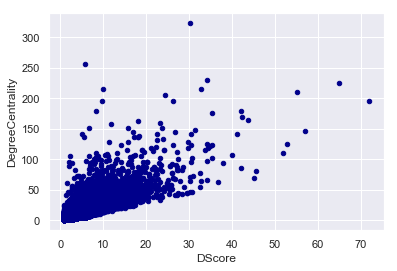

In [118]:

ax1 = df.plot.scatter(x='DScore',y='DegreeCentrality',c='DarkBlue')
plt.xlim(-0.5, 10)

ax2 = df.plot.scatter(x='DScore', y='DegreeCentrality',c='DarkBlue')

In [85]:
#type(df['DegreeCentrality'])

In [86]:
#import numpy as np

In [87]:
df['NAR']=(df['AvgRating']-df['AvgRating'].min())/(df['AvgRating'].max()-df['AvgRating'].min()) # AR normalized
df['NSR']=(df['SalesRank'].max()-df['SalesRank'])/(df['SalesRank'].max()-df['SalesRank'].min())
df.head()

,Title,SalesRank,TotalReviews,AvgRating,DegreeCentrality,ClusteringCoeff,NDC,DScore,NAR,NSR
0000037931,"Saluki Champions, 1952-1988",2031890,0,0.0,0,0.00,0.000000,1.000000,0.0,0.465060
0001047655,Prodigal Daughter,1116690,30,4.0,5,0.93,0.015432,4.467269,0.8,0.706006
0001053388,The Poetry of Lord Byron,1874503,0,0.0,0,0.00,0.000000,1.000000,0.0,0.506495
0001053736,Sir Gawain and the Green Knight,53150,15,4.5,5,0.70,0.015432,3.085169,0.9,0.986007
0001053744,Pearl and Sir Orfeo,500890,1,5.0,0,0.00,0.000000,1.000000,1.0,0.868129


In [88]:
df['TScore']=pow(df['TotalReviews'],df['NAR'])
df.head()

,Title,SalesRank,TotalReviews,AvgRating,DegreeCentrality,ClusteringCoeff,NDC,DScore,NAR,NSR,TScore
0000037931,"Saluki Champions, 1952-1988",2031890,0,0.0,0,0.00,0.000000,1.000000,0.0,0.465060,1.000000
0001047655,Prodigal Daughter,1116690,30,4.0,5,0.93,0.015432,4.467269,0.8,0.706006,15.194871
0001053388,The Poetry of Lord Byron,1874503,0,0.0,0,0.00,0.000000,1.000000,0.0,0.506495,1.000000
0001053736,Sir Gawain and the Green Knight,53150,15,4.5,5,0.70,0.015432,3.085169,0.9,0.986007,11.441478
0001053744,Pearl and Sir Orfeo,500890,1,5.0,0,0.00,0.000000,1.000000,1.0,0.868129,1.000000


(0, 500)

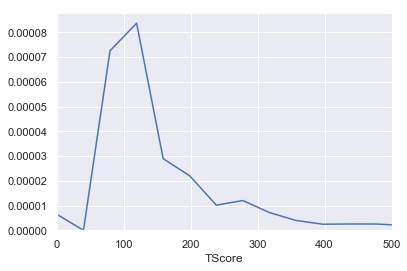

In [102]:
sns.distplot(df['TScore'], hist=False, kde=True, rug=False);
plt.xlim(0,500)

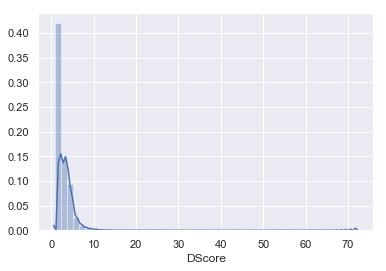

In [48]:
sns.distplot(df['DScore'], hist=True, kde=True, rug=False);

(0, 20)

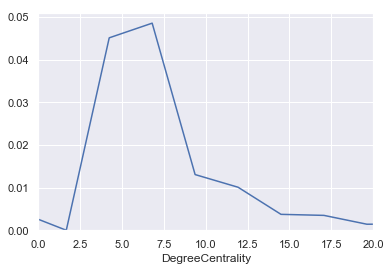

In [106]:
sns.distplot(df['DegreeCentrality'], hist=False, kde=True, rug=False);
plt.xlim(0,20)

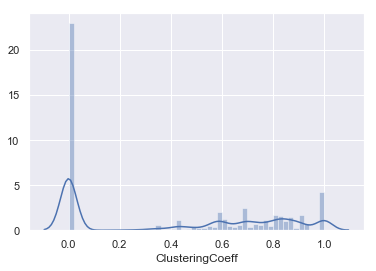

In [110]:
sns.distplot(df['ClusteringCoeff'], hist=True, kde=True, rug=False,bins=50);

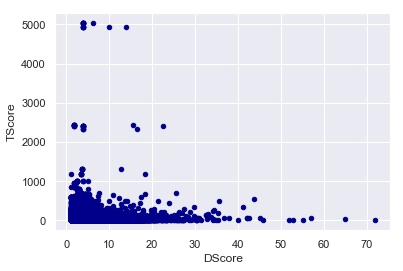

In [119]:
ax2 = df.plot.scatter(x='DScore', y='TScore',c='DarkBlue')

In [124]:
import math
df['SqTScore']=pow(df['TScore'],0.5)
df.head()

,Title,SalesRank,TotalReviews,AvgRating,DegreeCentrality,ClusteringCoeff,NDC,DScore,NAR,NSR,TScore,SqTScore
0000037931,"Saluki Champions, 1952-1988",2031890,0,0.0,0,0.00,0.000000,1.000000,0.0,0.465060,1.000000,1.000000
0001047655,Prodigal Daughter,1116690,30,4.0,5,0.93,0.015432,4.467269,0.8,0.706006,15.194871,3.898060
0001053388,The Poetry of Lord Byron,1874503,0,0.0,0,0.00,0.000000,1.000000,0.0,0.506495,1.000000,1.000000
0001053736,Sir Gawain and the Green Knight,53150,15,4.5,5,0.70,0.015432,3.085169,0.9,0.986007,11.441478,3.382525
0001053744,Pearl and Sir Orfeo,500890,1,5.0,0,0.00,0.000000,1.000000,1.0,0.868129,1.000000,1.000000


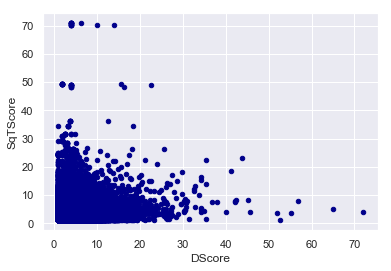

In [125]:
ax2 = df.plot.scatter(x='DScore', y='SqTScore',c='DarkBlue')

In [126]:
df['NSqTScore']=(df['SqTScore']-df['SqTScore'].min())/(df['SqTScore'].max()-df['SqTScore'].min())
df.head()

,Title,SalesRank,TotalReviews,AvgRating,DegreeCentrality,ClusteringCoeff,NDC,DScore,NAR,NSR,TScore,SqTScore,NSqTScore
0000037931,"Saluki Champions, 1952-1988",2031890,0,0.0,0,0.00,0.000000,1.000000,0.0,0.465060,1.000000,1.000000,0.000000
0001047655,Prodigal Daughter,1116690,30,4.0,5,0.93,0.015432,4.467269,0.8,0.706006,15.194871,3.898060,0.041409
0001053388,The Poetry of Lord Byron,1874503,0,0.0,0,0.00,0.000000,1.000000,0.0,0.506495,1.000000,1.000000,0.000000
0001053736,Sir Gawain and the Green Knight,53150,15,4.5,5,0.70,0.015432,3.085169,0.9,0.986007,11.441478,3.382525,0.034043
0001053744,Pearl and Sir Orfeo,500890,1,5.0,0,0.00,0.000000,1.000000,1.0,0.868129,1.000000,1.000000,0.000000


In [127]:
df['FScore']=pow(df['DScore'],df['NSqTScore'])
df.head()

,Title,SalesRank,TotalReviews,AvgRating,DegreeCentrality,ClusteringCoeff,NDC,DScore,NAR,NSR,TScore,SqTScore,NSqTScore,FScore
0000037931,"Saluki Champions, 1952-1988",2031890,0,0.0,0,0.00,0.000000,1.000000,0.0,0.465060,1.000000,1.000000,0.000000,1.000000
0001047655,Prodigal Daughter,1116690,30,4.0,5,0.93,0.015432,4.467269,0.8,0.706006,15.194871,3.898060,0.041409,1.063941
0001053388,The Poetry of Lord Byron,1874503,0,0.0,0,0.00,0.000000,1.000000,0.0,0.506495,1.000000,1.000000,0.000000,1.000000
0001053736,Sir Gawain and the Green Knight,53150,15,4.5,5,0.70,0.015432,3.085169,0.9,0.986007,11.441478,3.382525,0.034043,1.039098
0001053744,Pearl and Sir Orfeo,500890,1,5.0,0,0.00,0.000000,1.000000,1.0,0.868129,1.000000,1.000000,0.000000,1.000000


In [147]:
df['AScore']=df['NSR']*df['FScore']
df.head()

,Title,SalesRank,TotalReviews,AvgRating,DegreeCentrality,ClusteringCoeff,NDC,DScore,NAR,NSR,TScore,SqTScore,NSqTScore,FScore,AScore
0590353403,Harry Potter and the Sorcerer's Stone (Book 1),170,5039,5.0,42,0.49,0.129630,6.242983,1.0,0.999955,5039.0,70.985914,1.000000,6.242983,6.242702
0807281956,Harry Potter and the Sorcerer's Stone (Book 1 ...,1533,5039,5.0,4,1.00,0.012346,4.000000,1.0,0.999596,5039.0,70.985914,1.000000,4.000000,3.998385
059035342X,Harry Potter and the Sorcerer's Stone (Book 1),746,5034,5.0,4,1.00,0.012346,4.000000,1.0,0.999803,5034.0,70.950687,0.999497,3.997210,3.996424
0807281751,"Harry Potter and the Sorcerer's Stone (Book 1,...",6496,5039,5.0,4,1.00,0.012346,4.000000,1.0,0.998290,5039.0,70.985914,1.000000,4.000000,3.993158
0439139597,Harry Potter and the Goblet of Fire (Book 4),327,4924,5.0,20,0.77,0.061728,10.041373,1.0,0.999914,4924.0,70.171219,0.988359,9.775329,9.774485


In [148]:
df1=df.loc[purchasedAsinNeighbors]
df1.head()

,Title,SalesRank,TotalReviews,AvgRating,DegreeCentrality,ClusteringCoeff,NDC,DScore,NAR,NSR,TScore,SqTScore,NSqTScore,FScore,AScore
0152380116,I Went Walking (A Voyager/Hbj Book),149838,15,4.5,5,0.84,0.015432,3.864869,0.9,0.960552,11.441478,3.382525,0.034043,1.047099,1.005793
0399230130,"1,2,3 To the Zoo: A Counting Book",9108,5,4.5,23,0.76,0.070988,10.837102,0.9,0.997602,4.256700,2.063177,0.015191,1.036864,1.034377
0399229191,The Very Busy Spider (Board Book),2558,27,4.5,49,0.53,0.151235,7.866905,0.9,0.999326,19.419024,4.406702,0.048677,1.105618,1.104873
0399237720,Very Hungry Caterpillar Giant Board Book and P...,112356,164,4.5,5,1.00,0.015432,5.000000,0.9,0.970420,98.482590,9.923839,0.127509,1.227793,1.191474
0399220496,The Very Hungry Caterpillar Book with Plush Ca...,181105,164,4.5,5,1.00,0.015432,5.000000,0.9,0.952320,98.482590,9.923839,0.127509,1.227793,1.169251


In [149]:
df1.sort_values(by='AScore', ascending=False, inplace=True)
df1.head()

,Title,SalesRank,TotalReviews,AvgRating,DegreeCentrality,ClusteringCoeff,NDC,DScore,NAR,NSR,TScore,SqTScore,NSqTScore,FScore,AScore
0399226907,The Very Hungry Caterpillar board book,279,164,4.5,116,0.74,0.358025,33.705355,0.9,0.999926,98.48259,9.923839,0.127509,1.566013,1.565898
0152010661,Time for Bed,3122,87,5.0,60,0.57,0.185185,10.316829,1.0,0.999178,87.00000,9.327379,0.118987,1.320074,1.318989
0399208534,The Very Hungry Caterpillar,2117,164,4.5,5,1.00,0.015432,5.000000,0.9,0.999442,98.48259,9.923839,0.127509,1.227793,1.227108
0399237720,Very Hungry Caterpillar Giant Board Book and P...,112356,164,4.5,5,1.00,0.015432,5.000000,0.9,0.970420,98.48259,9.923839,0.127509,1.227793,1.191474
0399220496,The Very Hungry Caterpillar Book with Plush Ca...,181105,164,4.5,5,1.00,0.015432,5.000000,0.9,0.952320,98.48259,9.923839,0.127509,1.227793,1.169251


In [150]:
Alst=[]
Alst=list(df1.iloc[0:2].index)
Alst

['0399226907', '0152010661']

In [151]:
df1.sort_values(by='FScore', ascending=False, inplace=True)
df1.head()

,Title,SalesRank,TotalReviews,AvgRating,DegreeCentrality,ClusteringCoeff,NDC,DScore,NAR,NSR,TScore,SqTScore,NSqTScore,FScore,AScore
0399226907,The Very Hungry Caterpillar board book,279,164,4.5,116,0.74,0.358025,33.705355,0.9,0.999926,98.48259,9.923839,0.127509,1.566013,1.565898
0152010661,Time for Bed,3122,87,5.0,60,0.57,0.185185,10.316829,1.0,0.999178,87.00000,9.327379,0.118987,1.320074,1.318989
0399213015,The Very Hungry Caterpillar (MINIATURE EDITION),431501,164,4.5,5,1.00,0.015432,5.000000,0.9,0.886398,98.48259,9.923839,0.127509,1.227793,1.088312
0399208534,The Very Hungry Caterpillar,2117,164,4.5,5,1.00,0.015432,5.000000,0.9,0.999442,98.48259,9.923839,0.127509,1.227793,1.227108
0399237720,Very Hungry Caterpillar Giant Board Book and P...,112356,164,4.5,5,1.00,0.015432,5.000000,0.9,0.970420,98.48259,9.923839,0.127509,1.227793,1.191474


In [152]:
Blst=[]
Blst=list(df1.iloc[0:5].index)
Blst

['0399226907', '0152010661', '0399213015', '0399208534', '0399237720']

In [153]:
for i in range(5):
    if Blst[i] not in Alst:
        Alst.append(Blst[i])
    if len(Alst)==5:
        break
rec=Alst
print(rec)
len(set(rec))

['0399226907', '0152010661', '0399213015', '0399208534', '0399237720']


5